# EJERCICIOS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
from keras.activations import swish

2025-01-20 20:00:26.573032: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-20 20:00:26.580152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-20 20:00:26.588566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-20 20:00:26.591216: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 20:00:26.598666: I tensorflow/core/platform/cpu_feature_guar

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [2]:
datos = tf.keras.datasets.cifar10.load_data()

In [3]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = datos

# 50,000 entrenamiento
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# 5,000 validación
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

# 5,000 prueba
x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]


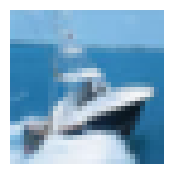

In [4]:
# muestra una imagen
plt.figure(figsize=(2, 2))
plt.imshow(x_train[8])
plt.axis('off')   # quita los ejes
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [5]:
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 
model.summary()

2025-01-20 20:00:30.696179: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-01-20 20:00:30.696210: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: iadb-17
2025-01-20 20:00:30.696213: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: iadb-17
2025-01-20 20:00:30.696414: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.120.0
2025-01-20 20:00:30.696423: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.120.0
2025-01-20 20:00:30.696426: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.120.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [6]:
historial = {'C':{'Tasa aprendizaje': None, 'Entrenamiento accuracy': 0, 
                     'Validacion accuracy': 0, 'Tiempo': None}}
rangos = [5e-6, 1e-6, 5e-5, 1e-5, 5e-4, 1e-4, 5e-3, 1e-3, 1e-2]

for lr in rangos:
    # compilar
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
              metrics=['accuracy'])
    # entrenar
    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
    time_fin = time.time()
    
    # guardar datos si son mejores
    val_acc = np.sort( hist.history['val_accuracy'])[-1]     # oredenado de menor a mayor cojo el ultimo
    if val_acc > historial['C']['Validacion accuracy']:
        t_acc = np.sort(hist.history['accuracy'])[-1]  
        historial['C'] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': t_acc, 
                     'Validacion accuracy': val_acc, 'Tiempo': time_fin-time_ini}
historial

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1033 - loss: 54.0051 - val_accuracy: 0.1234 - val_loss: 5.1058
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1123 - loss: 4.3764 - val_accuracy: 0.1208 - val_loss: 3.0300
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1271 - loss: 2.8923 - val_accuracy: 0.1398 - val_loss: 2.5821
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1461 - loss: 2.5011 - val_accuracy: 0.1668 - val_loss: 2.3529
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1764 - loss: 2.2996 - val_accuracy: 0.1776 - val_loss: 2.2378
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1973 - loss: 2.1879 - val_accuracy: 0.2230 - val_loss: 2.1480
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2189 - loss: 2.1092 - val_accuracy: 0.2244 - val_loss: 2.0934
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2394 - loss: 2.0606 

{'C': {'Tasa aprendizaje': 1e-05,
  'Entrenamiento accuracy': 0.48664000630378723,
  'Validacion accuracy': 0.45980000495910645,
  'Tiempo': 76.21988201141357}}

In [7]:
mejor_lr = historial['C']['Tasa aprendizaje']

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [8]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_D_checkpoints.weights.h5", save_weights_only=True)

hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                     callbacks=[checkpoint_cb,early_stopping_cb])


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
            metrics=['accuracy'])

time_ini = time.time()
hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
time_fin = time.time()

mejor_ep = 0
mejor_ep_acc = 0
val_acc_arr = hist.history['val_accuracy']
for i in range(len(val_acc_arr)): 
    if val_acc_arr[i] > mejor_ep_acc: 
        mejor_ep = i
        mejor_ep_acc = val_acc_arr[i]

historial['D'] = {'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': hist.history['accuracy'][mejor_ep], 
                    'Validacion accuracy': mejor_ep_acc, 'Tiempo': np.round(time_fin-time_ini), 'Mejor epoca': mejor_ep}

historial['D']

Epoch 1/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1009 - loss: 2.3042 - val_accuracy: 0.0982 - val_loss: 2.3034
Epoch 2/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0966 - loss: 2.3041 - val_accuracy: 0.0976 - val_loss: 2.3071
Epoch 3/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1003 - loss: 2.3042 - val_accuracy: 0.1010 - val_loss: 2.3030
Epoch 4/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0975 - loss: 2.3041 - val_accuracy: 0.0976 - val_loss: 2.3038
Epoch 5/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0983 - loss: 2.3042 - val_accuracy: 0.1010 - val_loss: 2.3032
Epoch 6/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1036 - loss: 2.3038 - val_accuracy: 0.1014 - val_loss: 2.3029
Epoch 7/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0988 - loss: 2.3037 - val_accuracy: 0.0994 - val_loss: 2.3042
Epoch 8/70
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0997 - loss: 2.3038 - 

{'Tasa aprendizaje': 1e-05,
 'Entrenamiento accuracy': 0.10000000149011612,
 'Validacion accuracy': 0.10140000283718109,
 'Tiempo': 409.0,
 'Mejor epoca': 0}

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [9]:
# Limpiamos memoria
tf.keras.backend.clear_session()

# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
    model.add(tf.keras.layers.BatchNormalization())      # normalizacion
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 


def ej_CyD(model, letra):
    mejor_acc = 0
    mejor_lr = None
    # C, hayar mejor lr
    rangos = [5e-6, 1e-6, 5e-5, 1e-5, 5e-4, 1e-4, 5e-3, 1e-3, 1e-2]
    for lr in rangos:
        # compilar
        model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
                metrics=['accuracy'])
        # entrenar
        time_ini = time.time()
        hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
        time_fin = time.time()
        
        # guardar mejor lr
        val_acc = np.sort( hist.history['val_accuracy'])[-1]     # oredenado de menor a mayor cojo el ultimo
        if val_acc > mejor_acc:
            mejor_lr = lr


    # D, aplicar detencion temprana con el mejor lr
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_"+letra+"_checkpoints.weights.h5", save_weights_only=True)

    hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                        callbacks=[checkpoint_cb,early_stopping_cb])


    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
                metrics=['accuracy'])

    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
    time_fin = time.time()

    mejor_ep = 0
    mejor_ep_acc = 0
    val_acc_arr = hist.history['val_accuracy']
    for i in range(len(val_acc_arr)): 
        if val_acc_arr[i] > mejor_ep_acc: 
            mejor_ep = i
            mejor_ep_acc = val_acc_arr[i]

    return {'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': hist.history['accuracy'][mejor_ep], 
        'Validacion accuracy': mejor_ep_acc, 'Tiempo': np.round(time_fin-time_ini), 'Mejor epoca': mejor_ep}

historial['E'] = ej_CyD(model,'E')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.1001 - loss: 3.0376 - val_accuracy: 0.1166 - val_loss: 4.0467
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1037 - loss: 2.8920 - val_accuracy: 0.1126 - val_loss: 3.9256
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1015 - loss: 2.8147 - val_accuracy: 0.1118 - val_loss: 4.0331
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1023 - loss: 2.7488 - val_accuracy: 0.1106 - val_loss: 3.5196
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1059 - loss: 2.6955 - val_accuracy: 0.1164 - val_loss: 3.5158
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1056 - loss: 2.6642 - val_accuracy: 0.1156 - val_loss: 3.4372
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1072 - loss: 2.6204 - val_accuracy: 0.1152 - val_loss: 3.2918
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1051 - loss: 2

KeyboardInterrupt: 

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [11]:
# Limpiamos memoria
tf.keras.backend.clear_session()

# estandarizar
media = np.mean(x_train, axis=(0, 1, 2))
desviacion = np.std(x_train, axis=(0, 1, 2))
x_train = (x_train - media) / desviacion
x_val = (x_val - media) / desviacion
x_test = (x_test - media) / desviacion


# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

historial['F'] = ej_CyD(model,'F')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2256 - loss: 2.2520 - val_accuracy: 0.3362 - val_loss: 1.8619
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3513 - loss: 1.8172 - val_accuracy: 0.3750 - val_loss: 1.7478
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3903 - loss: 1.7106 - val_accuracy: 0.4022 - val_loss: 1.6895
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4137 - loss: 1.6425 - val_accuracy: 0.4160 - val_loss: 1.6477
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4392 - loss: 1.5930 - val_accuracy: 0.4270 - val_loss: 1.6140
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4523 - loss: 1.5490 - val_accuracy: 0.4358 - val_loss: 1.5977
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4682 - loss: 1.5119 - val_accuracy: 0.4312 - val_loss: 1.5849
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4741 - loss: 1.4831 - 

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [12]:
# con la estandarizacion de F es suficiente, no es necesario estandarizar de nuevo

# Limpiamos memoria
tf.keras.backend.clear_session()

# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dropout(0.2))     # capa dropout ('apaga' un porcentaje de neuronas al azar)
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

historial['G'] = ej_CyD(model,'G')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1920 - loss: 2.4504 - val_accuracy: 0.3278 - val_loss: 1.9106
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3014 - loss: 1.9857 - val_accuracy: 0.3676 - val_loss: 1.7882
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3414 - loss: 1.8611 - val_accuracy: 0.3948 - val_loss: 1.7192
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3699 - loss: 1.7832 - val_accuracy: 0.4162 - val_loss: 1.6785
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3948 - loss: 1.7076 - val_accuracy: 0.4288 - val_loss: 1.6381
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4129 - loss: 1.6575 - val_accuracy: 0.4336 - val_loss: 1.6074
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4310 - loss: 1.6042 - val_accuracy: 0.4418 - val_loss: 1.6007
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4411 - loss: 1.5720 - 

In [ ]:
print('#####   RESULTADOS   #######')
for key,value in historial.items():
    print(key,': ',value)